In [33]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2021-08-10 07:08:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   252MB/s    in 2.0s    

2021-08-10 07:08:38 (252 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [34]:
import os

for dirpath, dirname, filename in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirname)} directories and {len(filename)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 10 directories and 0 imag

In [35]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [36]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+"/"+target_class

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

['1947572.jpg']
Image shape: (512, 512, 3)


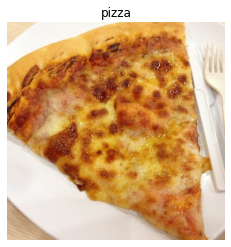

In [38]:
img = view_random_image(train_dir, random.choice(class_names))


In [39]:
!nvidia-smi

Tue Aug 10 07:08:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    33W /  70W |   2334MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [40]:
## Preprocess

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale= 1/255.)

train_data =  train_datagen.flow_from_directory(train_dir,
                                                target_size = (244,244),
                                                batch_size = 32,
                                                class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (244,244),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation

In [43]:
model_1 = Sequential([
                      Conv2D(10, 3, input_shape = (244,244, 3)),
                      Activation(activation="relu"),
                      Conv2D(10, 3, activation = "relu"),
                      MaxPool2D(2),
                      Conv2D(10, 3, activation = "relu"),
                      MaxPool2D(2),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(2),
                      Conv2D(10, 3, activation = "relu"),
                      Conv2D(10,3, activation='relu'),
                      MaxPool2D(2),
                      Flatten(),
                      Dense(10, activation='softmax')
])

model_1.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy']
                )

In [44]:
history_1 = model_1.fit(train_data,
                        batch_size = 32,
                        validation_data = test_data,
                        epochs=10,
                        steps_per_epoch = len(train_data),
                        validation_steps= len(test_data))

Epoch 1/10
235/235 [==============================] - 47s 198ms/step - loss: 2.2080 - accuracy: 0.1699 - val_loss: 2.0942 - val_accuracy: 0.2244
Epoch 2/10
235/235 [==============================] - 45s 193ms/step - loss: 2.0350 - accuracy: 0.2748 - val_loss: 1.9743 - val_accuracy: 0.2972
Epoch 3/10
235/235 [==============================] - 46s 195ms/step - loss: 1.8632 - accuracy: 0.3571 - val_loss: 1.8369 - val_accuracy: 0.3632
Epoch 4/10
235/235 [==============================] - 46s 198ms/step - loss: 1.7723 - accuracy: 0.3896 - val_loss: 1.9225 - val_accuracy: 0.3268
Epoch 5/10
235/235 [==============================] - 46s 195ms/step - loss: 1.6900 - accuracy: 0.4252 - val_loss: 1.7852 - val_accuracy: 0.3844
Epoch 6/10
235/235 [==============================] - 46s 196ms/step - loss: 1.6151 - accuracy: 0.4439 - val_loss: 1.8036 - val_accuracy: 0.3828
Epoch 7/10
235/235 [==============================] - 45s 192ms/step - loss: 1.5463 - accuracy: 0.4739 - val_loss: 1.8143 - val_ac

In [45]:
model_1.evaluate(test_data)

79/79 [==============================] - 11s 143ms/step - loss: 1.8810 - accuracy: 0.3800


[1.8810265064239502, 0.3799999952316284]

In [46]:
def plot_loss_curves(history):
  '''
  Returns separate loss cirve for training and validation metrics
  '''
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title("loss")
  plt.title("epochs")
  plt.legend()
   
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_acc, label = 'val_accuracy')
  plt.title("accuracy")
  plt.title("epochs")
  plt.legend()


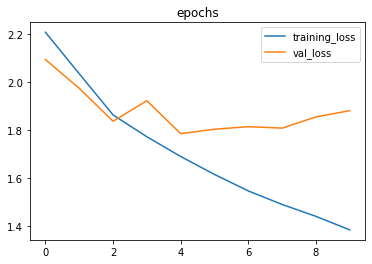

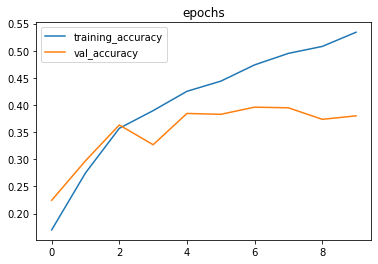

In [47]:
plot_loss_curves(history_1)

In [48]:
#Our model overfits

**Get more data** having more data makes our model to learn diversity.<br>
**Simplify the model**<br>
**Data Augmentation**<br>
**Transfer Learning**<br>

In [49]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 242, 242, 10)      280       
_________________________________________________________________
activation_2 (Activation)    (None, 242, 242, 10)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 240, 240, 10)      910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 120, 120, 10)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 118, 118, 10)      910       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 59, 59, 10)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 57, 57, 10)       

In [50]:
model_2 = Sequential([
                      Conv2D(10, 3, input_shape = (244,244, 3)),
                      Activation(activation="relu"),
                      Conv2D(10, 3, activation = "relu"),
                      MaxPool2D(2),
                      Conv2D(10, 3, activation = "relu"),
                      MaxPool2D(2),
                      Conv2D(10,3, activation='relu'),
                      MaxPool2D(2),
                      Flatten(),
                      Dense(10, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy']
                )

In [51]:
history_2 =  model_2.fit(train_data,
            validation_data=test_data,
            steps_per_epoch = len(train_data),
            batch_size = 32,
            epochs = 5,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 197ms/step - loss: 2.1248 - accuracy: 0.2245 - val_loss: 2.0279 - val_accuracy: 0.2624
Epoch 2/5
235/235 [==============================] - 46s 194ms/step - loss: 1.8868 - accuracy: 0.3479 - val_loss: 1.8872 - val_accuracy: 0.3508
Epoch 3/5
235/235 [==============================] - 45s 193ms/step - loss: 1.7223 - accuracy: 0.4180 - val_loss: 1.7990 - val_accuracy: 0.3700
Epoch 4/5
235/235 [==============================] - 46s 197ms/step - loss: 1.5165 - accuracy: 0.4955 - val_loss: 1.8784 - val_accuracy: 0.3632
Epoch 5/5
235/235 [==============================] - 46s 197ms/step - loss: 1.2369 - accuracy: 0.5844 - val_loss: 2.0375 - val_accuracy: 0.3460


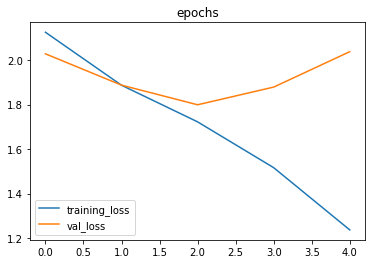

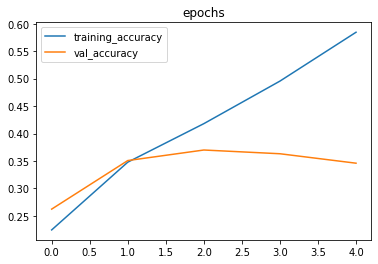

In [52]:
plot_loss_curves(history_2)

In [53]:
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0.2,
                                       width_shift_range = 0.2,
                                       height_shift_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)

In [54]:
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size = (224, 224),
                                                       batch_size = 32,
                                                       class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [55]:
model_3= tf.keras.models.clone_model(model_2)

In [56]:
model_3.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [58]:
history_3 =  model_3.fit(train_data,
            validation_data=test_data,
            steps_per_epoch = len(train_data),
            batch_size = 32,
            epochs = 5,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 198ms/step - loss: 2.0885 - accuracy: 0.2467 - val_loss: 1.9542 - val_accuracy: 0.2896
Epoch 2/5
235/235 [==============================] - 46s 196ms/step - loss: 1.9135 - accuracy: 0.3269 - val_loss: 1.8958 - val_accuracy: 0.3320
Epoch 3/5
235/235 [==============================] - 46s 195ms/step - loss: 1.7376 - accuracy: 0.4088 - val_loss: 1.8512 - val_accuracy: 0.3428
Epoch 4/5
235/235 [==============================] - 45s 191ms/step - loss: 1.5027 - accuracy: 0.4875 - val_loss: 1.9141 - val_accuracy: 0.3360
Epoch 5/5
235/235 [==============================] - 46s 197ms/step - loss: 1.1791 - accuracy: 0.6055 - val_loss: 2.1843 - val_accuracy: 0.3204


In [59]:
model_3.save("model_3")

INFO:tensorflow:Assets written to: model_3/assets
